In [5]:
import os

import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from matplotlib.colors import ListedColormap
from scipy.fftpack import dct, idct
from scipy.optimize import minimize

plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})

mat = scipy.io.loadmat(os.path.join('..', 'datasets', 'CC2.mat'))
CC = mat['CC']
CC_map = ListedColormap(CC)

p = 14
n = 32

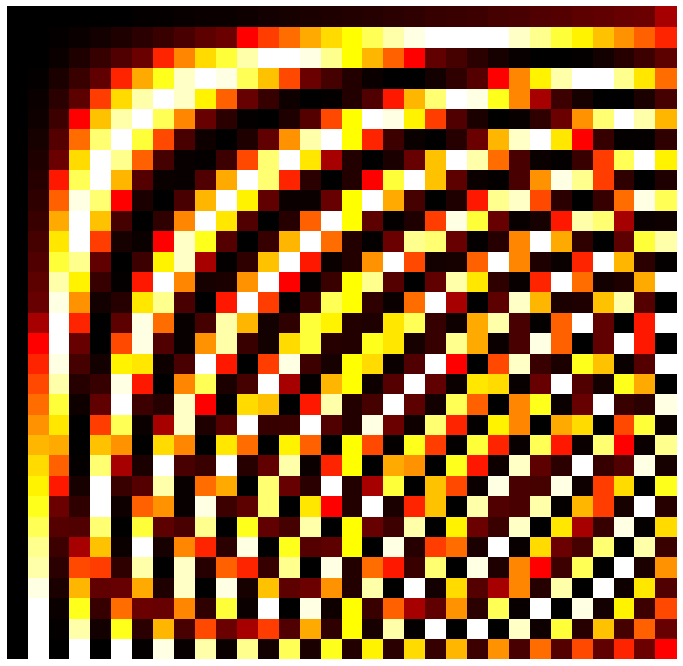

In [6]:
## Plot Psi
# def padflip(X):
#     nx,ny = X.shape
#     X = np.flipud(X)
#     Y = np.zeros((nx+1,ny+1))
#     Y[:-1,:-1] = X
#     return Y

Psi = dct(np.identity(n))
plt.pcolor(np.flipud(Psi),cmap=CC_map)
plt.axis('off')
plt.show()

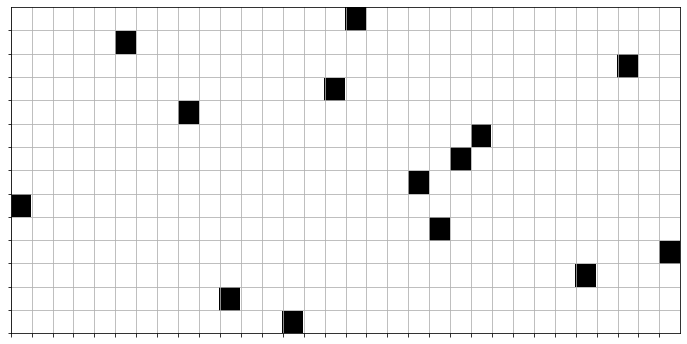

In [7]:
## Plot C
plt.rcParams['figure.figsize'] = [12, 6]
fig,ax = plt.subplots(1,1)
C = np.identity(n)
perm = np.random.permutation(n)[:p]
C = C[perm,:] # compressed measurement
plt.pcolor(np.flipud(C),cmap=CC_map)
plt.grid(True)
plt.xticks(np.arange(n))
plt.yticks(np.arange(len(perm)))
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

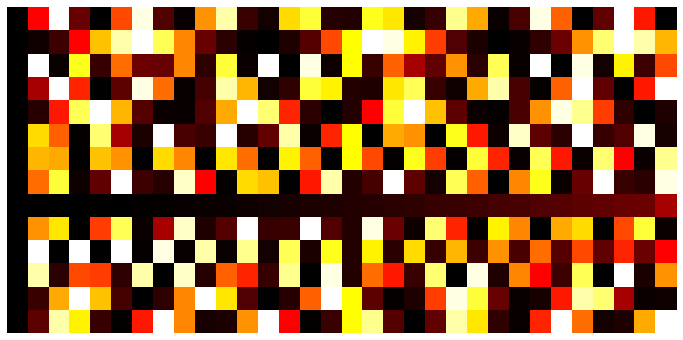

In [8]:
## Plot Theta

Theta = C @ Psi
plt.pcolor(np.flipud(Theta),cmap=CC_map)
plt.axis('off')
plt.show()

/var/folders/sm/lw2bbffs15g5l3r4ldd25hc00000gn/T/ipykernel_19178/3805388911.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sbackslash = np.linalg.lstsq(Theta, y)[0]


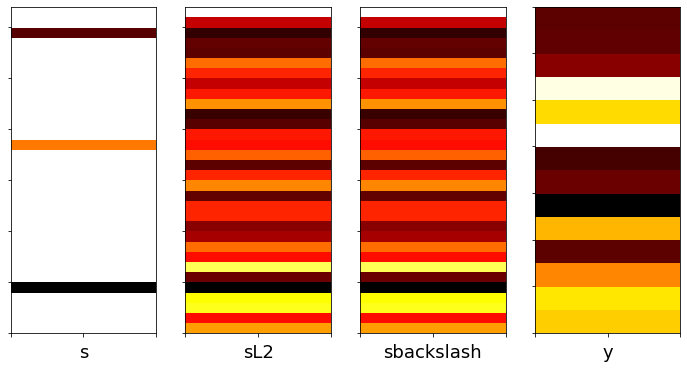

In [9]:
## Plot s, y
s = np.zeros((n, 1))
s[2] = 1.4
s[13] = 0.7
s[27] = 2.2
y = C @ Psi @ s

fig, axs = plt.subplots(1, 4)
axs[0].pcolor(np.flipud(s), cmap=CC_map)
axs[0].set_xlabel('s')

sL2 = np.linalg.pinv(Theta) @ y
axs[1].pcolor(np.flipud(sL2), cmap=CC_map)
axs[1].set_xlabel('sL2')

sbackslash = np.linalg.lstsq(Theta, y)[0]
axs[2].pcolor(np.flipud(sbackslash), cmap=CC_map)
axs[2].set_xlabel('sbackslash')

axs[3].pcolor(np.flipud(y), cmap=CC_map)
axs[3].set_xlabel('y')

for ax in axs:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

plt.show()

In [10]:
## L1-Minimization using SciPy
def L1_norm(x):
    return np.linalg.norm(x, ord=1)


y = y.reshape(-1)
constr = ({'type': 'eq', 'fun': lambda x: Theta @ x - y})
x0 = np.linalg.pinv(Theta) @ y
res = minimize(L1_norm, x0, method='SLSQP', constraints=constr)
s2 = res.x

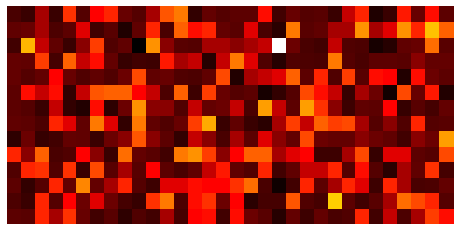

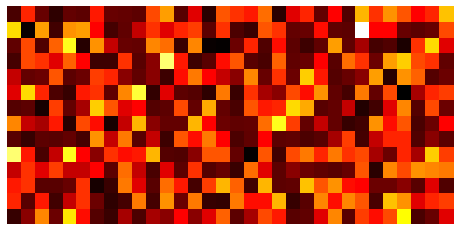

In [11]:
## Plot C and Theta (2) - Gaussian Random
plt.rcParams['figure.figsize'] = [8, 4]

C = np.random.randn(p, n)

plt.figure()
plt.pcolor(np.flipud(C), cmap=CC_map)
plt.axis('off')
plt.show()

Theta = C @ Psi
plt.figure()
plt.pcolor(np.flipud(Theta), cmap=CC_map)
plt.axis('off')
plt.show()

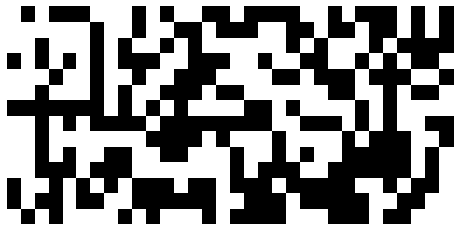

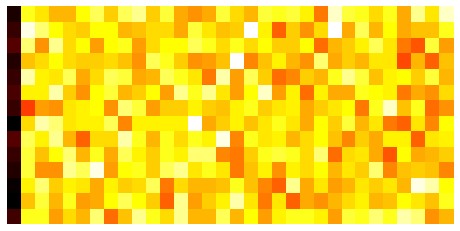

In [12]:
# Plot C and Theta (3) - Bernoulli Random
C = np.random.randn(p, n)
C = C > 0

plt.figure()
plt.pcolor(np.flipud(C), cmap=CC_map)
plt.axis('off')
plt.show()

plt.figure()
Theta = C @ Psi
plt.pcolor(np.flipud(Theta), cmap=CC_map)
plt.axis('off')
plt.show()

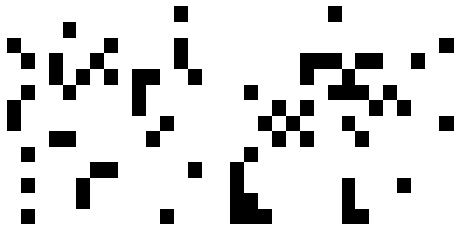

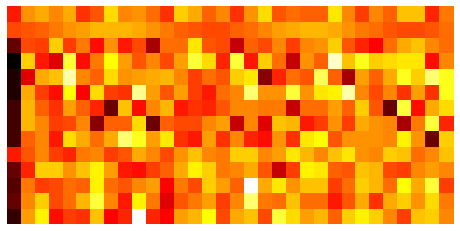

In [13]:
# Plot C and Theta (4) - Sparse Bernoulli
C = np.random.randn(p, n)
C = C > 1

plt.figure()
plt.pcolor(np.flipud(C), cmap=CC_map)
plt.axis('off')
plt.show()

plt.figure()
Theta = C @ Psi
plt.pcolor(np.flipud(Theta), cmap=CC_map)
plt.axis('off')
plt.show()

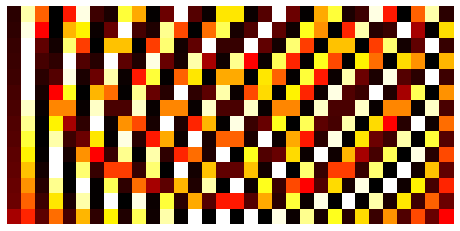

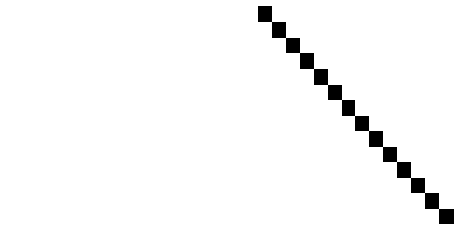

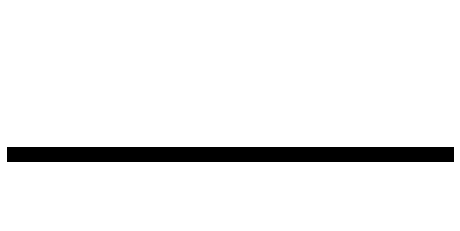

In [14]:
# Bad C and Theta (5) - DCT Meas
C = idct(np.identity(n))
perm = np.arange(n - p, n)
C = C[perm, :]  # compressed measurement

plt.figure()
plt.pcolor(np.flipud(C), cmap=CC_map)
plt.axis('off')
plt.show()

plt.figure()
Theta = C @ Psi
plt.pcolor(np.flipud(Theta), cmap=CC_map)
plt.axis('off')
plt.show()

plt.figure()
y = Theta @ s
plt.pcolor(np.flipud(y), cmap=CC_map)
plt.axis('off')
plt.show()